# Very basic 4 layer neural network
In this note book we are going to write simple 4 layer neural network in python.
Let's begin with intruducing dataset we are going to work with.

| X1   | X2   |  X3  |  Y   |
|------|------|------|------|
| 0    | 0    |  1   |  0   |
| 0    | 1    |  1   |  1   |
| 1    | 0    |  1   |  1   |
| 1    | 1    |  1   |  0   |

Here the target is Y column and the input is left side of the table marked as X. 

In [21]:
import math
import numpy as np

In [29]:
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0,1,1,0]]).T
print(X, y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]] [[0]
 [1]
 [1]
 [0]]


### Activation function
To activate layers we are going to use sigmoid function which returns a value between 0 and 1 for any given argument. It is especially proper function to use when dealing with probability.

In [30]:
def sigmoid(x, deriv = False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

### Weights initialization

In [31]:
#initialize weights
w01 = np.random.random((3,4))
w12 = np.random.random((4,4))
w23 = np.random.random((4,1))
#print(w01, w12, w23)

### Training loop

In [32]:
EPOCHS = 10000
err = []
#training loop
l0 = X #input
for iteration in range(EPOCHS):
    '''feed forward'''
    #l1 activation
    l1 = sigmoid(np.dot(l0, w01)) #4x4
    #l2 activation
    l2 = sigmoid(np.dot(l1, w12)) #4x4
    #l3 acivation
    l3 = sigmoid(np.dot(l2, w23)) #4x1
    
    '''back propagation'''
    l3_error = y -l3
    
    err.append(math.fabs(np.mean(l3_error)))
    if iteration%1000== 0:
        print(np.mean(l3_error))
        
    #convinced l3 error
    l3_delta = l3_error*sigmoid(l3, deriv = True)
    
    #l2 error
    l2_error = l3_delta.dot(w23.T) #(4x1)(1x4) = 4x4
    #convinced l2 error
    l2_delta  = l2_error*sigmoid(l2, deriv = True)#(4x4)
    
    #l1 error
    l1_error = l2_delta.dot(w12) #(4x4)
    #convinced l1 error
    l1_delta = l1_error *sigmoid(l1, deriv = True) #(4x4)
    
    w23 += l2.T.dot(l3_delta) #4x1+= 4x4 dot 4x1
    w12 += l1.T.dot(l2_delta) #4x4+= 4x4 dot 4x4
    w01 += l0.T.dot(l1_delta) #3x4 += 3x4 dot 4x4
    

-0.37655850225998655
-0.0019383714848948963
0.0007531835031685374
0.0003511309609560316
0.0002576881453409414
0.00021250140454938827
0.00018486261959130843
0.0001658097051347486
0.00015168315548865028
0.00014068229198624252


### Learning plot and final results

Text(0.5, 1.0, 'learning plot')

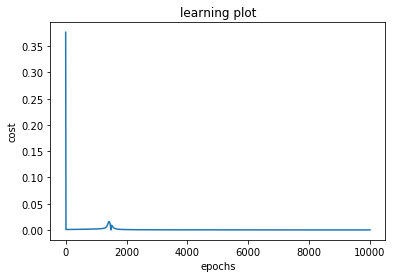

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(len(err)), err)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('learning plot')

In [34]:
l3

array([[0.00468028],
       [0.99370757],
       [0.99300107],
       [0.00808382]])